In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Q. No. 1 Section 4. Image classification

### Development of image classification 
Image classification involves classify the image into certain label and it was the first task that deep learning demonstrates success. The success of AlexNet laid a strong fundation for further AI applications and image classification is used in different sectors. Summary for the image classification used in different areas: 
- **Medical Imaging**: improve diagnostic accuracy
- **Agriculture**: monitor crop health, predict yields, and detect plant diseases
- **Retail Industry**:  automatic product categorization, inventory management, and online shopping enhanced with visual search capabilities
- **Environmental Monitoring**: track deforestation, monitor changes in the natural environment, and assess water quality
- **Manufacturing**:  automates quality control processes by identifying defects and verifying assembly

### Image classification loss functions

The core loss function used for image classification(Table 6 from the paper): 


-   **Function: BCE (Binary Cross-Entropy)**
    -   **Usage:** Binary Classification, Common in logistic regression
    -   **Data characteristics:** Labels in {0, 1}, Sensitive to imbalance
    -   **Advantages:** Probabilistic interpretation, Strong penalty for confident mistakes
    -   **Limitations:** Overconfidence if not regularized, Often needs weighting
    -   **Formula:**
        For a single sample, let $y$ be the true binary label (0 or 1) and $\hat{y}$ be the predicted probability of the positive class.
        $$L(y, \hat{y}) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]$$

-   **Function: CCE (Categorical Cross-Entropy)**
    -   **Usage:** Multi-class classification, Softmax-based outputs
    -   **Data characteristics:** One-hot labels, Class imbalance is possible
    -   **Advantages:** Differentiable, Strong penalty for misclassifications
    -   **Limitations:** Requires one-hot (extra memory), Sensitive to class imbalance
    -   **Formula:**
        For a single sample with $C$ classes, let $y_i$ be the true label (1 if class $i$ is the true class, 0 otherwise) and $\hat{y}_i$ be the predicted probability for class $i$.
        $$L(y, \hat{y}) = - \sum_{i=1}^{C} y_i \log(\hat{y}_i)$$

-   **Function: Sparse CCE**
    -   **Usage:** Large-class problems, Integer-labeled data
    -   **Data characteristics:** No one-hot encoding, Useful with large vocabularies
    -   **Advantages:** Memory efficient, Same probabilistic basis as CCE
    -   **Limitations:** Only for integer labels, Imbalance remains an issue
    -   **Formula:** Sparse CCE **does not have a standalone mathematical formula**. It internally converts integer labels to one-hot encoding and then applies the standard Categorical Cross-Entropy (CCE) formula. Therefore, its core computation is identical to CCE.

-   **Function: Weighted cross-entropy**
    -   **Usage:** Binary or multi-class tasks, Class imbalance or cost sensitivity
    -   **Data characteristics:** Labels in {0,1} or one-hot, Per-class or per-label weights
    -   **Advantages:** Mitigates imbalance by up-weighting minority classes
    -   **Limitations:** Requires careful weight tuning, Large weights can destabilize training
    -   **Formula (General form, for multi-class with class weights):**
        Let $w_i$ be the weight for class $i$. The loss for a single sample is:
        $$L(y, \hat{y}) = - \sum_{i=1}^{C} w_i y_i \log(\hat{y}_i)$$


-   **Function: Label smoothing**
    -   **Usage:** Large-scale multi-class, Reduces overconfidence
    -   **Data characteristics:** One-hot or near one-hot, Uses small $\epsilon$
    -   **Advantages:** Improves generalization,Penalizes extreme confidence
    -   **Limitations:** Needs tuning, May slow convergence
    -   **Formula:**
        Label smoothing modifies the original one-hot labels $y_{hot}$ into smoothed labels $y_{ls}$.
        $$y_{ls} = (1 - \alpha) y_{hot} + \frac{\alpha}{K}$$
        Where $K$ is the number of classes, and $\alpha$ is the smoothing factor (a hyperparameter, typically a small value like 0.1).
        Then, this smoothed $y_{ls}$ is used in place of $y_{hot}$ in the Categorical Cross-Entropy (CCE) formula:
        $$L(y_{ls}, \hat{y}) = - \sum_{i=1}^{C} y_{ls,i} \log(\hat{y}_i)$$

-   **Function: NLL (Negative Log Likelihood)**
    -   **Usage:** Equivalent to CE with one-hot, General classification
    -   **Data characteristics:** Typically one-hot labels, Probability matching
    -   **Advantages:** Interpretable as $-\log(\text{true prob.})$,Common in likelihood frameworks
    -   **Limitations:** Suffers from imbalance, Overconfidence = large gradient
    -   **Formula:**
        NLL in multi-class problems is usually combined with the Softmax activation function, and the combination of Softmax and NLL is equivalent to Categorical Cross-Entropy. If $\hat{y}_i$ is the output of the Softmax layer (i.e., the predicted probability), then for the true class $k$ of a sample:
        $$L(y, \hat{y}) = - \log(\hat{y}_k)$$
        This is equivalent to the CCE formula when $y_k=1$ and all other $y_i=0$.

-   **Function: PolyLoss**
    -   **Usage:** General framework, Extensions of CE, focal loss
    -   **Data characteristics:** Binary or multi-class, Flexible via polynomial terms
    -   **Advantages:** Tunable sensitivity,Additional hyperparameter(s)
    -   **Limitations:** Requires careful coefficient choice, Increases complexity
    -   **Formula (Poly-1 Loss as an example, simplest form):**
        PolyLoss is a polynomial expansion of the Cross-Entropy Loss. A common form is Poly-1 Loss, which only modifies the first term of the Cross-Entropy:
        $$L_{Poly-1}(\hat{y}_k) = - \log(\hat{y}_k) + \epsilon (1 - \hat{y}_k)$$
        Where $\hat{y}_k$ is the predicted probability for the true class $k$, and $\epsilon$ is a tunable parameter.

-   **Function: Hinge Loss**
    -   **Usage:** Margin-based classification, SVM-style learning
    -   **Data characteristics:** Binary labels {-1, 1}, Decision boundary approach
    -   **Advantages:** Encourages margin maximization,Zero loss beyond margin
    -   **Limitations:** Not probabilistic, Less suited for probabilistic outputs
    -   **Formula (For binary classification, labels $y \in \{-1, 1\}$):**
        Let $y$ be the true label ($-1$ or $1$), and $\hat{y}$ be the raw score output by the classifier (e.g., for a linear SVM, $\hat{y} = \mathbf{w} \cdot \mathbf{x} + b$).
        $$L(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})$$




**Additional considerations compared with standard classification tasks** 

Including **Large-Scale Datasets**(the image dataset may have large number of classes and images), **Class Imbalance in Visual Data**(the number of each class may be imbalanced). **Architectural Considerations**(different architectures(CNN, Vision Transformers) affect the performance of the model), **Label Smoothing in Vision Tasks**(replace one-hot targets with a softly distributed label vector), **Multi-Label Image Classification**(there are multiple labels for a single image).

**How to deal with these considerations?** 

When doing the image classification task, Firstly select a proper architecture(CNN, vision transfermers). When choosing the loss function if there has class imbalance use weighted cross-entropy or focal loss, if the image has multi-label use binary cross-entropy loss. If the dataset is in a large-scale, use  regularization techniques or focal loss and we can replace one-hot targets with a softly distributed label vector makeing the model have better generalization ability. Additionally we can use some data augmentation(rotate, crop...) when preprocessing the image datasets.


### Image classifcation metrics
**Metrics used in classification task(Table 7 from the paper)**

| Common name            | Other names             | Abbr. | Definitions                      | Interpretations                                   |
| :--------------------- | :---------------------- | :---- | :------------------------------- | :------------------------------------------------ |
| True positive          | Hit                     | TP    | True sample labeled true         | Correctly labeled true sample                     |
| True negative          | Rejection               | TN    | False sample labeled false       | Correctly labeled false sample                    |
| False positive         | False alarm, Type I Error | FP    | False sample labeled true        | Incorrectly labeled false sample                  |
| False negative         | Miss, Type II Error     | FN    | True sample labeled false        | Incorrectly label true sample                     |
| Recall                 | True positive rate      | TPR   | TP/(TP+FN)                       | % of True samples correctly labeled               |
| Specificity            | True negative rate      | SPC, TNR | TN/(TN+FP)                      | % of False samples correctly labeled              |
| Precision              | Positive predictive value | PPV   | TP/(TP+FP)                       | % of samples labeled true that really are true    |
| Negative predictive Value |                         | NPV   | TN/(TN+FN)                       | % of samples labeled false that really are false  |
| False negative rate    |                         | FNR   | FN/(TP+FN)=1-TPR                 | % of True samples incorrectly labeled             |
| False positive rate    | Fall-out                | FPR   | FP/(FP+FN)=1-SPC                 | % of False samples incorrectly labeled            |
| False discovery rate   |                         | FDR   | FP/(TP+FP)=1-PPV                 | % of samples labeled true that are really false   |
| True discovery rate    |                         | TDR   | FN/(TN+FN)=1-NPV                 | % of samples labeled false that are really true   |
| Accuracy               |                         | ACC   | (TP+TN) / (TP+TN+FP+FN)          | Percent of samples correctly labeled              |
| F1 score               |                         | F1    | (2\*TP) / (2\*TP+FP+FN)          | Approaches 1 as errors decline                    |

**Additional measures**
For the image classification scenarios that need additional metrics and visual methods. 

- **Top-k Accuracy**:  A prediction is considered correct if the true class is among the top-k highest-probability predictions
- **Per-Class Accuracy and Balanced Metrics**: The accuracy of per-class which is used in highly imbalanced datasets.
- **Precision-Recall Curves for Rare Classes**: Focus on minority classes, analyze the precison-recall curves.
- **Confusion Matrices for Visual Inspection**: Visualize the confusion metrics of multi-class classification tasks by heatmaps.
- **Robustness and Interpretability**: Robustness evaluations attacks or noise and  interpretability metrics which reflect additional real-world considerations.
- **Multi-Label Precision, Recall, and F1**: Compute Metrics like precision, recall and F1 across on all relevant labels for the task that images have different labels. 

### Conclusion for the Image Classification section

This section introduce about the loss function and metrics used on image classification. The core loss function and metrics is the same as those used on standard classification tasks. For the special case in image classification we can use some special loss function(binary cross-entropy loss on multi-label image, weighted cross-entropy on class imbalanced image) combining with additional techniques(data augmentation, specialized regularizers), making the model can better generalize.

## Q. No.2

### a) Train separate perceptrons for each gate Implement a single-layer perceptron that learns the AND, OR, and XOR logic gates.

In [ ]:
def create_dataset(data_type="AND"):
    """
    create data.
    data_type="AND" or "OR" or "XOR"

    return x and y 
    """
    x=np.array([[0,0],[0,1],[1,0],[1,1]]) # all the condition of 0 and 1 has included
    if data_type=='AND':
        y=np.array([0,0,0,1])
    elif data_type=='OR':
        y=np.array([0,1,1,1])
    else:
        y=np.array([0,1,1,0])
    
    return x,y

class single_layer_model:
    def __init__(self, input_size, lr=0.1, num_epoch=5):
        """
        initialize the parameter
        w is the wight
        b is the bias
        lr: learning rate
        num_epoch: number of training epoch
        """
        self.w = np.zeros(input_size)  
        self.b=0
        self.lr = lr    
        self.num_epoch = num_epoch

    def activate(self, x):
        """
        the activation function
        """
        if x>=0:
            return 1
        else:
            return 0

    def predict(self, x):
        """
        return the value of the prediction
        """
        val = np.dot(self.w,x)+self.b
        val=self.activate(val)

        return val

    def fit(self, X, Y):
        """
        train the model to fit the data
        """
        
        for i in range(self.num_epoch):
            error_all=0
            for j in range(len(X)):
                x,y=X[j],Y[j]
                y_pred = self.predict(x)
                error = y - y_pred
                error_all+=np.abs(error)
                # update the model
                self.w += self.lr * error * x       
                self.b += self.lr * error   
            print(f'Epoch: {i}, error: {error_all}')

    def test(self,X,Y):
        """
        test the accuracy
        """
        correct=0
        for i in range(len(X)):
            x,y=X[i],Y[i]
            y_pred=self.predict(x)
            correct+= (y==y_pred)
        return correct/len(X)*100



# start traing
# as there are just four conditions of 0 and 1. I directly use the training data to test the accuracy.
# AND model
model_and=single_layer_model(input_size=2)
X_and,Y_and=create_dataset("AND")
model_and.fit(X_and,Y_and)
print(f'accuracy of AND model : {model_and.test(X_and,Y_and)} %')



#OR model
model_or=single_layer_model(input_size=2)
X_or,Y_or=create_dataset("OR")
model_or.fit(X_or,Y_or)
print(f'accuracy of OR model : {model_or.test(X_or,Y_or)} %')


#XOR model
model_xor=single_layer_model(input_size=2)
X_xor,Y_xor=create_dataset("XOR")
model_xor.fit(X_xor,Y_xor)
print(f'accuracy of XOR model : {model_xor.test(X_xor,Y_xor)} %')




Epoch: 0, error: 2
Epoch: 1, error: 3
Epoch: 2, error: 3
Epoch: 3, error: 0
Epoch: 4, error: 0
accuracy of AND model : 100.0 %
Epoch: 0, error: 2
Epoch: 1, error: 2
Epoch: 2, error: 1
Epoch: 3, error: 0
Epoch: 4, error: 0
accuracy of OR model : 100.0 %
Epoch: 0, error: 3
Epoch: 1, error: 3
Epoch: 2, error: 4
Epoch: 3, error: 4
Epoch: 4, error: 4
accuracy of XOR model : 50.0 %


### b) Plot the decision boundary for AND and OR cases

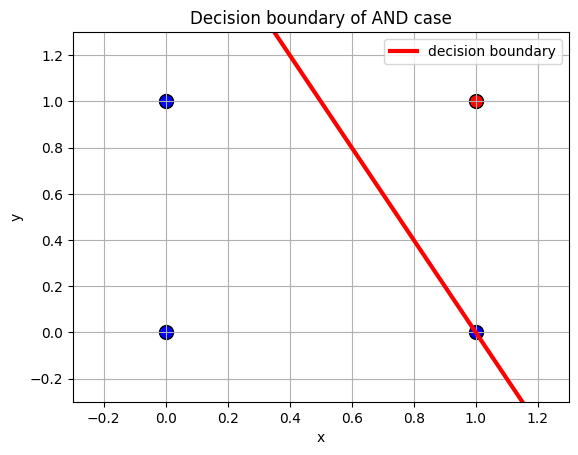

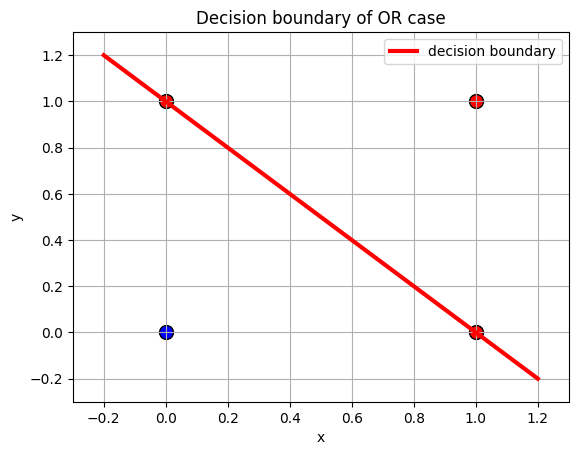

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, Y, title):
    """
    plot the decision boundary givem model and data.
    """
    x = np.linspace(-0.2, 1.2, 100)  # range of x
    if model.w[1] != 0:
        y = -(model.w[0] * x + model.b) / model.w[1]

    plt.figure()
    for xx, y_true in zip(X, Y):
        plt.scatter(xx[0], xx[1], c='r' if y_true == 1 else 'b', edgecolors='k', s=100)
    plt.plot(x, y, label='decision boundary', color='red', linewidth=3)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-0.3, 1.3)
    plt.ylim(-0.3, 1.3)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_decision_boundary(model_and,X_and,Y_and,'Decision boundary of AND case')
plot_decision_boundary(model_or,X_or,Y_or,'Decision boundary of OR case')

### c) Explain why XOR fails

The reason why XOR fails is that single-layer perceptron can only learn linearly separable function. The rule of XOR is not linearly separable. But for AND and OR we can use a straight line in 2-d space to separate the 4 points(4 conditions) shown on the figure above.

## Q.No.3 Implement sigmoid, tanh, and ReLU activation functions with their derivatives.

### a) Plot all functions and their derivatives (-5 to 5 x-range)

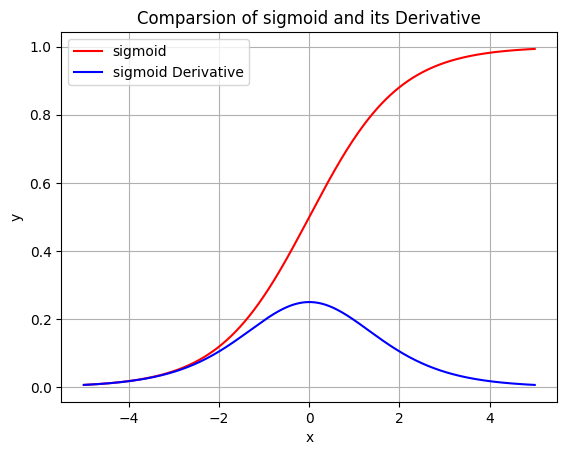

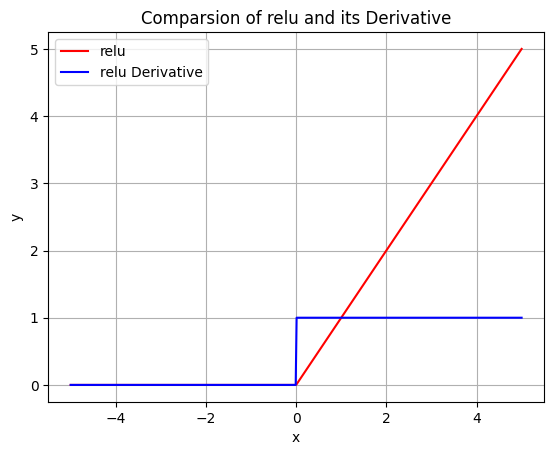

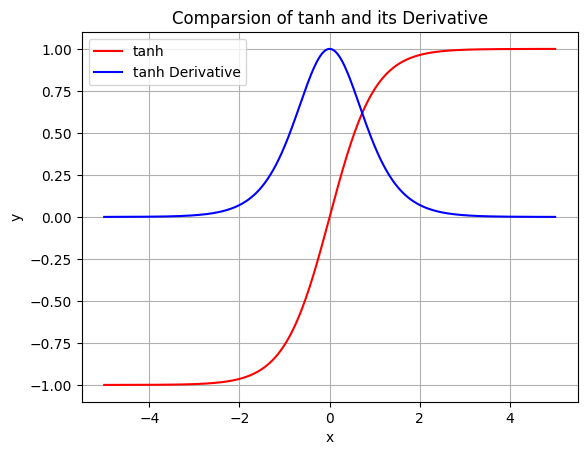

In [ ]:
"""
activation functions and their derivatives
"""
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_de(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    exp_pos = np.exp(x)
    exp_neg = np.exp(-x)
    return (exp_pos - exp_neg) / (exp_pos + exp_neg)

def tanh_de(x):
    return 1 - tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_de(x):
    return np.where(x > 0, 1, 0)

def plot_fun(act_func,de_func,rang_l=-5,range_r=5, num_points=500,title="activate function"):
    """
    plot the function and its derivation
    """
    x = np.linspace(rang_l, range_r, num_points)
    plt.figure()
    plt.plot(x, act_func(x), label=f'{title}',color='red')
    plt.plot(x, de_func(x), label=f'{title} Derivative',color='blue')

    plt.title(f'Comparsion of {title} and its Derivative')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.grid(True)
    plt.legend()
    plt.show()

plot_fun(sigmoid,sigmoid_de,title="sigmoid")
plot_fun(relu,relu_de,title="relu")
plot_fun(tanh,tanh_de,title="tanh")






### b) Create a wrapper function that returns both activation and derivative based on user input

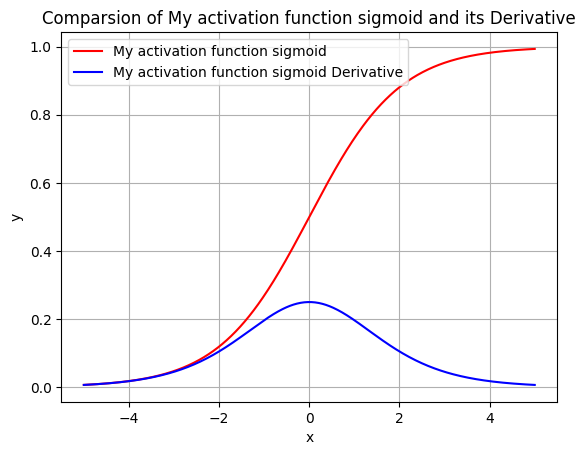

In [14]:
def get_func(func_name):
    """
    input: the name of the function
    output: both activation and derivative
    """
    if func_name == "sigmoid":
        return sigmoid, sigmoid_de
    elif func_name == "tanh":
        return tanh, tanh_de
    elif func_name == "relu":
        return relu, relu_de
    else:
        raise ValueError("No such function. please select between: sigmoid, tanh, relu.")

# test the function get_func
my_func,my_func_de=get_func('sigmoid')
plot_fun(my_func,my_func_de,title="My activation function sigmoid")

## Q. No. 4

### Implement forward propagation for a 3-layer neural network (input=4, hidden=6, output=1) with:
### a) Configurable activation functions
### b) Random weight initialization (properly scaled)
### c) Output calculation for sample input

In [ ]:
class My_NN:
    def __init__(self, input_size=4, hidden_size=6, output_size=1, 
                 hidden_activation_func_name="sigmoid", output_activation_func_name="relu", initial_method="he",seed=None):
        """
        forward propagation of a 3 layer neural network
        hidden_activation_func_name, output_activation_func_name : name of selected activation function
        initial_method: method to weight initialization
        seed: random seed
        """
        if seed is not None: # random seed chose when initialize the parameter
            np.random.seed(seed)

        # initialize the parameter

        self.w0,self.b0 = self.weight_init(hidden_size,input_size,initial_method)

        self.w1,self.b1 = self.weight_init(output_size,hidden_size,initial_method)

        hidden_func,_=get_func(hidden_activation_func_name)
        output_func,_=get_func(output_activation_func_name)

        self.hidden_activation = hidden_func
        self.output_activation = output_func
    
    def weight_init(self,output_size,input_size,method):

        """
        chose the method to initialize the parameter in proper scale:
        selectable: 'xavier', 'he', 'random'

        """
        if method == "xavier":
            scale = np.sqrt(1.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "he":
            scale = np.sqrt(2.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "random":
            w = np.random.randn(output_size, input_size)
        else:
            raise ValueError("Unsupported method. please chose from: 'xavier', 'he', 'random'")
        
        # bias initialize to 0
        b = np.zeros((output_size, 1))  

        return w, b

    def forward(self, x):
        """
        forward process
        x:(input_size, 1)
        """
        output1 = np.dot(self.w0,x) + self.b0
        output2 = self.hidden_activation(output1)

        output3 = np.dot(self.w1,output2) + self.b1
        result = self.output_activation(output3)

        return result

# randomly sample 
x = np.random.rand(4, 1)
model = My_NN(hidden_activation_func_name="tanh", output_activation_func_name="sigmoid", initial_method="he",seed=12)
forward_output=model.forward(x)

print(f'Result after forward propagation: {forward_output}')

Result after forward propagation: [[0.33534622]]


## Q. No. 5 Implement mean squared error (MSE) and binary crossentropy loss functions with their derivatives

### a) Write vectorized implementations

In [16]:

# mse loss 
def mse(y_hat, y):
    return np.mean((y_hat - y) ** 2)

# mse derivative
def mse_de(y_hat, y):
    N = y_hat.size
    return 2 * (y - y_hat) / N

# bce loss
def bce(y_hat, y):
    return -np.mean(y_hat * np.log(y) + (1 - y_hat) * np.log(1 - y))

# bce derivative
def bce_de(y_hat, y):
    return (y - y_hat) / (y * (1 - y) * y_hat.size)


### b) Test with sample predictions and true values

In [17]:

# set the random seed when  randomly sample the test data
np.random.seed(0)

# sample the label 0 or 1
y_hat = np.random.randint(0, 2, size=(2, 1))

# sample the predicted values [0,1]
y_mse = np.random.rand(2, 1)
y_bce = np.random.rand(2, 1)

# show the sample
print("y_true:\n", y_hat)
print("y_pred_mse:\n", y_mse)
print("y_pred_bce:\n", y_bce)

# MSE
print("mse Loss:", mse(y_hat, y_mse))
print("mse Derivative:\n", mse_de(y_hat, y_mse))

# BCE
print("bce Loss:", bce(y_hat, y_bce))
print("bce Derivative:\n", bce_de(y_hat, y_bce))


y_true:
 [[0]
 [1]]
y_pred_mse:
 [[0.71518937]
 [0.60276338]]
y_pred_bce:
 [[0.54488318]
 [0.4236548 ]]
mse Loss: 0.3346463825810906
mse Derivative:
 [[ 0.71518937]
 [-0.39723662]]
bce Loss: 0.8230187300860887
bce Derivative:
 [[ 1.09861904]
 [-1.18020615]]


### c) Plot loss curves for gradual improvement

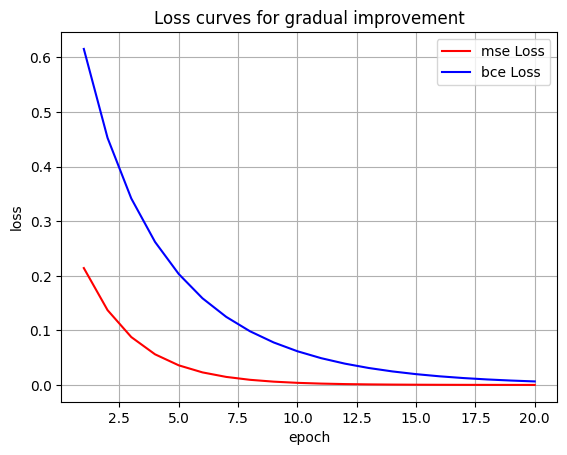

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# random seed for sampling
np.random.seed(0)
y_hat = np.random.randint(0, 2, (2, 1))  # ture label
y_pred = np.random.rand(2, 1)       # preticted label

# start implement
epochs = 20
# list used to store the value when doing improvement
mse_curve = []
bce_curve = []
for i in range(epochs):
    # for every epoch the predicted value approach to the ground truth one a little
    y_pred = y_pred + 0.2 * (y_hat - y_pred)
    
    mse_curve.append(mse(y_hat, y_pred))
    bce_curve.append(bce(y_hat, y_pred))

# plat the loss curve
plt.figure()
plt.plot(range(1, epochs+1), mse_curve, label='mse Loss', color='red')
plt.plot(range(1, epochs+1), bce_curve, label='bce Loss', color='blue')
plt.title("Loss curves for gradual improvement")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()


## Q. No. 6 Implement full backpropagation for a 2-layer network:
### a) Use synthetic data (e.g., sklearn.make_moons)
### b) Include learning rate and epochs as parameters
### c) Visualize the loss curve and final decision boundary

epoch 0: Loss 0.6059
epoch 200: Loss 0.2892
epoch 400: Loss 0.2677
epoch 600: Loss 0.2618
epoch 800: Loss 0.2597


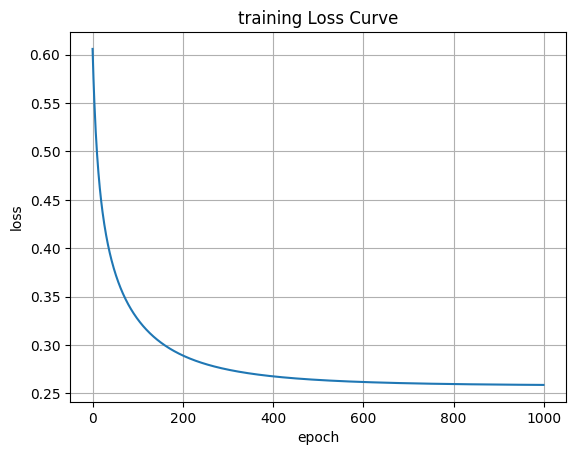

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_de(x):
    s = sigmoid(x)
    return s * (1 - s)


def moon_dataset_create(num_sample,nosie,random_st):
    """
    create the moon dataset.
    num_sample: number of the sample
    noise: propation of the noise
    random_st: random state

    return the X (2-d), label(0 or 1)
    """
    x, y = make_moons(n_samples=num_sample, noise=nosie, random_state=random_st)
    x = x.T  
    y = y.reshape(1, -1) 
    return x,y


class two_layer_model:
    def __init__(self, input_size, output_size=1, activation='sigmoid', init_method='xavier', lr=0.1, seed=None):

        """
        implementment of a 2-layer model (intput->output)
        activation : activation function
        initial_method: method to weight initialization
        seed: random seed
        lr: learning rate
        """
        if seed is not None:
            np.random.seed(seed)

        self.lr = lr
        self.losses = [] # list to record the loss during training process

        self.w, self.b = self.weight_init(output_size, input_size, init_method)
        self.activation, self.activation_deriv = get_func(activation)

    def weight_init(self,output_size,input_size,method):

        """
        chose the method to initialize the parameter in proper scale:
        selectable: 'xavier', 'zero', 'random'

        """
        if method == "xavier":
            scale = np.sqrt(1.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "zero":
            w = np.zeros((output_size, input_size)) 
        elif method == "random":
            w = np.random.randn(output_size, input_size)
        else:
            raise ValueError("Unsupported method. please chose from: 'xavier', 'zero', 'random'")
        
        # bias initialize to 0
        b = np.zeros((output_size, 1))  

        return w, b

    def forward(self, x):
        """
        forward process
        """
        self.z = np.dot(self.w,x) + self.b
        self.a = self.activation(self.z)
        return self.a

    def bce_loss(self, y, y_hat, eps=1e-12):
        """
        calculate the BCE loss
        """
        y_hat = np.clip(y_hat, eps, 1 - eps) # avoid log(0)
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def backward(self, x, y):
        """
        backpropagation
        update w and b with certain learning rate
        """
        m = x.shape[1]
        dz = self.a - y
        dw = (1 / m) * np.dot(dz,x.T)
        db = (1 / m) * np.sum(dz, axis=1, keepdims=True)
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def train(self, X, Y, epochs=1000, print_interval=200):
        """
        train the model 
        """
        for i in range(epochs):
            y_hat = self.forward(X)
            loss = self.bce_loss(Y, y_hat)
            self.losses.append(loss)
            self.backward(X, Y)
            if i % print_interval == 0:
                print(f"epoch {i}: Loss {loss:.4f}")

    def predict(self, X):
        """
        if ouput >0.1 ouput the result as 1
        otherwise ouput 0.
        """
        return (self.forward(X) > 0.5).astype(int)

    def predict_proba(self, X):
        """
        get the probability of the perdiction
        """
        return self.forward(X)

    def get_loss(self):
        """
        the list of loss during training process
        """
        return self.losses

# define and train the model
model = two_layer_model(input_size=2, output_size=1, activation='sigmoid', lr=0.3, seed=0)
x,y=moon_dataset_create(500,0.1,0)

model.train(x, y, epochs=1000)

# visualize the loss curve
plt.plot(model.get_loss())
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("training Loss Curve")
plt.grid(True)
plt.show()

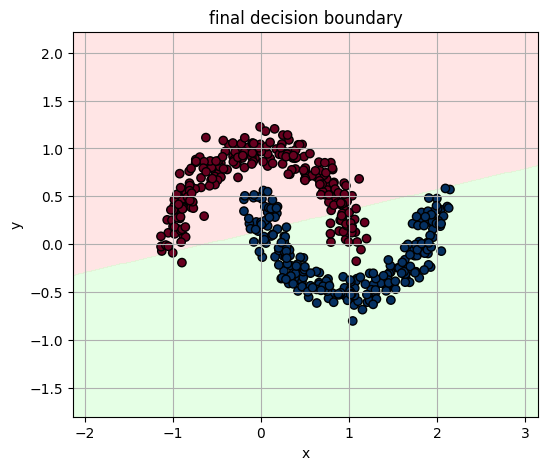

In [58]:
def plot_decision_boundary(model_fn, X, Y, title="final decision boundary"):
    """
    plot the decisionn boundary give data
    """
    # the range of x and y
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1

    # use grid
    x, y = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[x.ravel(), y.ravel()].T

    # get the prediction
    pre = model_fn(grid_points)
    pre = pre.reshape(x.shape)

    # plot
    plt.figure(figsize=(6, 5))
    plt.contourf(x, y, pre > 0.5, alpha=0.5, colors=["#ffcccc", "#ccffcc"])
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

# plot the final decision boundary
plot_decision_boundary(model.predict_proba, x, y)

## Q. No. 7 Create a weight initialization comparison:
### a) Implement zero, random-normal, and Xavier initialization
### b) Train the same network with each method
### c) Plot training curves for all three on same axes

zero : 
epoch 0: Loss 0.6931
epoch 200: Loss 0.3015
epoch 400: Loss 0.2758
random : 
epoch 0: Loss 0.9444
epoch 200: Loss 0.3080
epoch 400: Loss 0.2778
xavier : 
epoch 0: Loss 0.8635
epoch 200: Loss 0.3061
epoch 400: Loss 0.2772


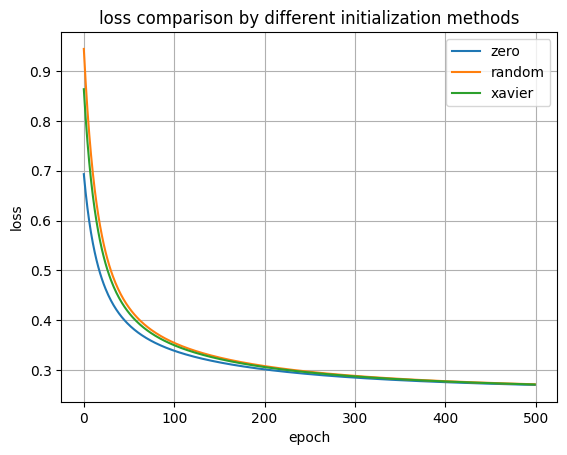

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_de(x):
    s = sigmoid(x)
    return s * (1 - s)


def moon_dataset_create(num_sample,nosie,random_st):
    """
    create the moon dataset.
    num_sample: number of the sample
    noise: propation of the noise
    random_st: random state

    return the X (2-d), label(0 or 1)
    """
    x, y = make_moons(n_samples=num_sample, noise=nosie, random_state=random_st)
    x = x.T  
    y = y.reshape(1, -1) 
    return x,y


class two_layer_model:
    def __init__(self, input_size, output_size=1, activation='sigmoid', init_method='xavier', lr=0.1, seed=None):

        """
        implementment of a 2-layer model (intput->output)
        activation : activation function
        initial_method: method to weight initialization
        seed: random seed
        lr: learning rate
        """
        if seed is not None:
            np.random.seed(seed)

        self.lr = lr
        self.losses = [] # list to record the loss during training process

        self.w, self.b = self.weight_init(output_size, input_size, init_method)
        self.activation, self.activation_deriv = get_func(activation)

    def weight_init(self,output_size,input_size,method):

        """
        chose the method to initialize the parameter in proper scale:
        selectable: 'xavier', 'zero', 'random'

        """
        if method == "xavier":
            scale = np.sqrt(1.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "zero":
            w = np.zeros((output_size, input_size)) 
        elif method == "random":
            w = np.random.randn(output_size, input_size)
        else:
            raise ValueError("Unsupported method. please chose from: 'xavier', 'zero', 'random'")
        
        # bias initialize to 0
        b = np.zeros((output_size, 1))  

        return w, b

    def forward(self, x):
        """
        forward process
        """
        self.z = np.dot(self.w,x) + self.b
        self.a = self.activation(self.z)
        return self.a

    def bce_loss(self, y, y_hat, eps=1e-12):
        """
        calculate the BCE loss
        """
        y_hat = np.clip(y_hat, eps, 1 - eps) # avoid log(0)
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def backward(self, x, y):
        """
        backpropagation
        update w and b with certain learning rate
        """
        m = x.shape[1]
        dz = self.a - y
        dw = (1 / m) * np.dot(dz,x.T)
        db = (1 / m) * np.sum(dz, axis=1, keepdims=True)
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def train(self, X, Y, epochs=1000, print_interval=200):
        """
        train the model 
        """
        for i in range(epochs):
            y_hat = self.forward(X)
            loss = self.bce_loss(Y, y_hat)
            self.losses.append(loss)
            self.backward(X, Y)
            if i % print_interval == 0:
                print(f"epoch {i}: Loss {loss:.4f}")

    def predict(self, X):
        """
        if ouput >0.1 ouput the result as 1
        otherwise ouput 0.
        """
        return (self.forward(X) > 0.5).astype(int)

    def predict_proba(self, X):
        """
        get the probability of the perdiction
        """
        return self.forward(X)

    def get_loss(self):
        """
        the list of loss during training process
        """
        return self.losses

# plot the training curve with different weight initialization methods
ini_method = ['zero', 'random', 'xavier']
loss_dict = {}
x,y=moon_dataset_create(500,0.1,0)
for method in ini_method:
    print(method,": ")
    model = two_layer_model(input_size=2, output_size=1, activation='sigmoid',
                            init_method=method, lr=0.2, seed=6)
    
    model.train(x, y, epochs=500)
    loss_dict[method] = model.get_loss()


# plot on the same axes
plt.figure()
for method, loss_list in loss_dict.items():
    plt.plot(loss_list, label=method)

plt.title("loss comparison by different initialization methods")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()



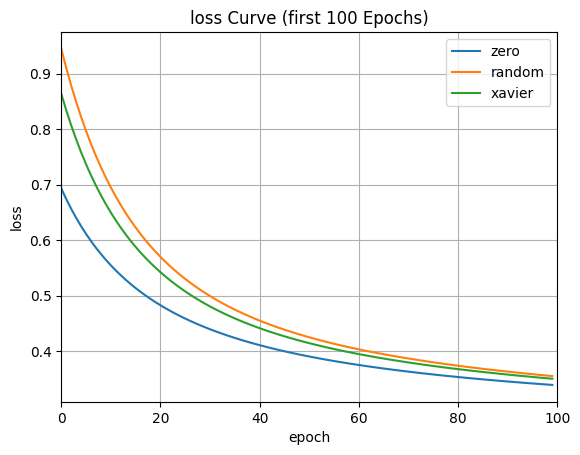

In [64]:
# zoom in the first 100 epochs
plt.figure()
for method, loss_list in loss_dict.items():
    plt.plot(loss_list[:100], label=method)  
plt.title("loss Curve (first 100 Epochs)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xlim(0, 100)  
plt.legend()
plt.grid(True)
plt.show()


## Q. No. 8 Implement gradient checking for a simple backpropagation network
### a) Compare analytical gradients to numerical gradients
### b) Compute relative error
### c) Verify backpropagation implementation

In [68]:
class two_layer_model:
    def __init__(self, input_size, output_size=1, activation='sigmoid', init_method='xavier', lr=0.1, seed=None):

        """
        implementment of a 2-layer model (intput->output)
        activation : activation function
        initial_method: method to weight initialization
        seed: random seed
        lr: learning rate
        """
        if seed is not None:
            np.random.seed(seed)

        self.lr = lr
        self.losses = [] # list to record the loss during training process

        self.w, self.b = self.weight_init(output_size, input_size, init_method)
        self.activation, self.activation_deriv = get_func(activation)

    def weight_init(self,output_size,input_size,method):

        """
        chose the method to initialize the parameter in proper scale:
        selectable: 'xavier', 'zero', 'random'

        """
        if method == "xavier":
            scale = np.sqrt(1.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "zero":
            w = np.zeros((output_size, input_size)) 
        elif method == "random":
            w = np.random.randn(output_size, input_size)
        else:
            raise ValueError("Unsupported method. please chose from: 'xavier', 'zero', 'random'")
        
        # bias initialize to 0
        b = np.zeros((output_size, 1))  

        return w, b

    def forward(self, x):
        """
        forward process
        """
        self.z = np.dot(self.w,x) + self.b
        self.a = self.activation(self.z)
        return self.a

    def bce_loss(self, y, y_hat, eps=1e-12):
        """
        calculate the BCE loss
        """
        y_hat = np.clip(y_hat, eps, 1 - eps) # avoid log(0)
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def backward(self, x, y):
        """
        backpropagation
        update w and b with certain learning rate
        """
        m = x.shape[1]
        dz = self.a - y
        dw = (1 / m) * np.dot(dz,x.T)
        db = (1 / m) * np.sum(dz, axis=1, keepdims=True)
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def train(self, X, Y, epochs=1000, print_interval=200):
        """
        train the model 
        """
        for i in range(epochs):
            y_hat = self.forward(X)
            loss = self.bce_loss(Y, y_hat)
            self.losses.append(loss)
            self.backward(X, Y)
            if i % print_interval == 0:
                print(f"epoch {i}: Loss {loss:.4f}")

    def predict(self, X):
        """
        if ouput >0.1 ouput the result as 1
        otherwise ouput 0.
        """
        return (self.forward(X) > 0.5).astype(int)

    def predict_proba(self, X):
        """
        get the probability of the perdiction
        """
        return self.forward(X)

    def get_loss(self):
        """
        the list of loss during training process
        """
        return self.losses

def numerical_grad(f, w, eps=1e-5):
    """
    compute the numerical gradient
    """
    grad = np.zeros_like(w)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            org_val = w[i, j]
            w[i, j] = org_val + eps
            L = f(w)
            w[i, j] = org_val - eps
            R = f(w)

            grad[i, j] = (L - R) / (2 * eps) # finite difference
            w[i, j] = org_val  

    return grad

def compute_relative_error(grad1, grad2):
    """
    compute the difference between two gradient(analytical gradient,numerical gradient)
    """
    num_L2 = np.linalg.norm(grad1 - grad2)
    norm = np.linalg.norm(grad1) + np.linalg.norm(grad2)
    return num_L2 / (norm + 1e-12) # difference after normalization


class grad_check:
    """
    check the gradient by compute the loss with new w
    """
    def __init__(self, model, x, y):
        self.model = model
        self.x = x
        self.y = y

    def new_w_loss(self, w):
        """
        check the loss with new w
        """
        org_w = self.model.w.copy()# original w
        self.model.w = w.copy()
        y_hat = self.model.forward(self.x)
        loss = self.model.bce_loss(self.y, y_hat) # compute the loss
        self.model.w = org_w  
        return loss


np.random.seed(0)
# create the model and sample to test
model = two_layer_model(input_size=2, output_size=1, activation='sigmoid',init_method='xavier', lr=0.1, seed=0)
x = np.random.rand(2, 1)
y = np.array([[1]])

# forward + backward
model.forward(x)
model.backward(x, y)
# compute analytical gradient
analytical_grad = np.dot((model.a - y),x.T)

# compute numerical gradient
wrapper = grad_check(model, x, y)
numerical_grad = numerical_grad(wrapper.new_w_loss, model.w)

# Compute relative error
rel_error = compute_relative_error(numerical_grad, analytical_grad)
print("Analytical gradient:\n", analytical_grad)
print("Numerical gradient:\n", numerical_grad)
print('')
print(f"Relative error: {rel_error:.10f}")

# Verify backpropagation implementation by a threshold
if rel_error < 0.02:
    print("Gradient Check Passed!")
else:
    print("Gradient Check Failed!")



Analytical gradient:
 [[-0.17348088 -0.15682243]]
Numerical gradient:
 [[-0.16763761 -0.15154026]]

Relative error: 0.0171297288
Gradient Check Passed!


## Q. No. 9 Visualize learned features:

### a) Train a backpropagation network on MNIST (using NumPy only)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MNIST_NN:
    def __init__(self, input_size=784, hidden_size=16, output_size=10, lr=0.1, initial_method='xavier',seed=0):
        np.random.seed(seed)
        self.lr = lr
        # initialize the parameter
        self.w0,self.b0 = self.weight_init(hidden_size,input_size,initial_method)
        self.w1,self.b1 = self.weight_init(output_size,hidden_size,initial_method)


    def weight_init(self,output_size,input_size,method):

        """
        chose the method to initialize the parameter in proper scale:
        selectable: 'xavier', 'he', 'random'

        """
        if method == "xavier":
            scale = np.sqrt(1.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "he":
            scale = np.sqrt(2.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "random":
            w = np.random.randn(output_size, input_size)
        else:
            raise ValueError("Unsupported method. please chose from: 'xavier', 'he', 'random'")
        
        # bias initialize to 0
        b = np.zeros((output_size, 1))  

        return w, b
    
    def relu(self, x):
        return np.maximum(0, x)

    def relu_de(self, x):
        """
        derivative of relu
        """
        return (x > 0).astype(float)

    def softmax(self, x):
        """
        softmax before the output
        """
        exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
        return exp_x / np.sum(exp_x, axis=0, keepdims=True)

    def forward(self, x):
        """
        forward process
        """
        self.z1 = np.dot(self.w0,x) + self.b0
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.w1,self.a1) + self.b1
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, y_hat, y_pred):
        m = y_hat.shape[1]
        return -np.sum(y_hat * np.log(y_pred + 1e-8)) / m

    def backward(self, x, y_hat):
        """
        backward process
        """
        m = x.shape[1]
        dz2 = self.a2 - y_hat
        dw2 = np.dot(dz2 ,self.a1.T) / m
        db2 = np.sum(dz2, axis=1, keepdims=True) / m
        da1 = np.dot(self.w1.T ,dz2)
        dz1 = da1 * self.relu_de(self.z1)
        dw1 = np.dot(dz1 ,x.T) / m
        db1 = np.sum(dz1, axis=1, keepdims=True) / m

        # update
        self.w0 -= self.lr * dw1
        self.b0 -= self.lr * db1
        self.w1 -= self.lr * dw2
        self.b1 -= self.lr * db2

    def train(self, X, Y, epochs=100, batch_size=32):
        """
        train the model
        """
        losses = []
        for epoch in range(epochs):
            # random shuffle after chose the index
            shu_choice = np.random.permutation(X.shape[1])
            X_shu, Y_shu = X[:, shu_choice], Y[:, shu_choice]

            for i in range(0, X.shape[1], batch_size):
                x_batch = X_shu[:, i:i+batch_size]
                y_batch = Y_shu[:, i:i+batch_size]
                y_pred = self.forward(x_batch)
                self.backward(x_batch, y_batch)

            # record the loss
            y_pred = self.forward(X)
            loss = self.compute_loss(Y, y_pred)
            losses.append(loss)
        return losses

    def visualize_hidden_weights(self, num_show=16):
        """
        visualize the first hidden layer as 28*28 image
        """
        for i in range(min(num_show, self.w0.shape[0])):
            plt.subplot(4, 4, i + 1)
            plt.imshow(self.w0[i].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.suptitle("first hidden layer weights")
        plt.show()





start training...


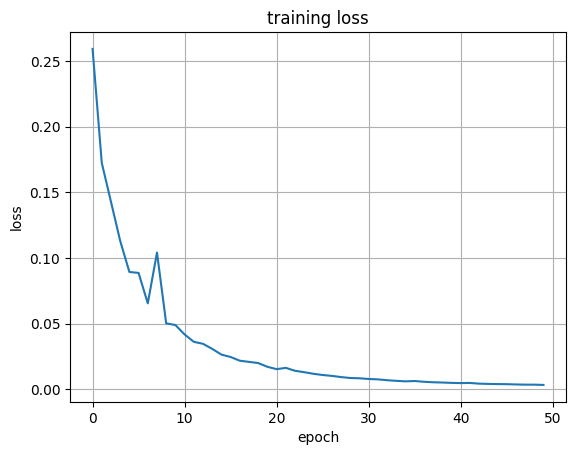

In [73]:
import numpy as np
import matplotlib.pyplot as plt


def load_mnist_npz(path="/home/chunjielu/25sum/DL/dataset/mnist.npz", num_samples=1000):
    """
    load the MNIST image from given path
    """
    data = np.load(path)
    X = data["x_train"][:num_samples].reshape(num_samples, -1) / 255.0  # normalization
    y = data["y_train"][:num_samples]
    X = X.T  # shape: (784, N)
    Y = np.zeros((10, num_samples))
    Y[y, np.arange(num_samples)] = 1  # one-hot code
    return X, Y


# load the dataset and train the model
X, Y = load_mnist_npz(num_samples=50000)
model = MNIST_NN(input_size=784, hidden_size=512, output_size=10, lr=0.1)

# training
print("start training...")
losses = model.train(X, Y, epochs=50, batch_size=64)
# visualize the loss during training
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("training loss")
plt.grid(True)
plt.show()



### b) Plot the weights of first hidden layer as 28×28 images

weights of first hidden layer


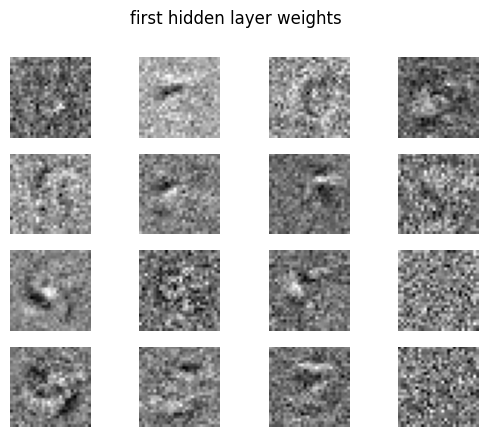

In [74]:

# visualize the first hidden layer weights
print("weights of first hidden layer")
model.visualize_hidden_weights(num_show=16)

### c) Briefly interpret what patterns the network learned

From some of the image of the weights of the first layer we can see it has some contour of the digit. The weights resemble part of the digit by lines and curves which means the first hidden layer is trying to learn the pattern of the contour.
